In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

/Users/konstantin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['suicide'].replace({1: 'YES', 0: 'NO'}, inplace=True)
df['success'].replace({1: 'YES', 0: 'NO'}, inplace=True)

In [4]:
list(df)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

Пик 2014 года приходится на войну в сирии.

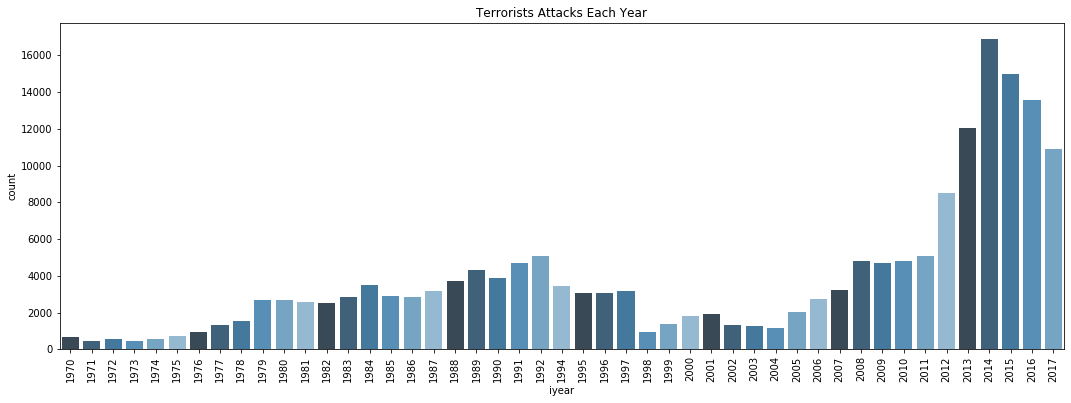

In [5]:
plt.subplots(figsize=(18,6))
sns.countplot('iyear', data=df, palette=sns.color_palette("Blues_d"))
plt.xticks(rotation=90)
plt.title('Terrorists Attacks Each Year')
plt.show()

Терракты равномерно совершаются в каждый день месяца. 

Нулевые дни, это архивные данные и ошибки в новых событиях.

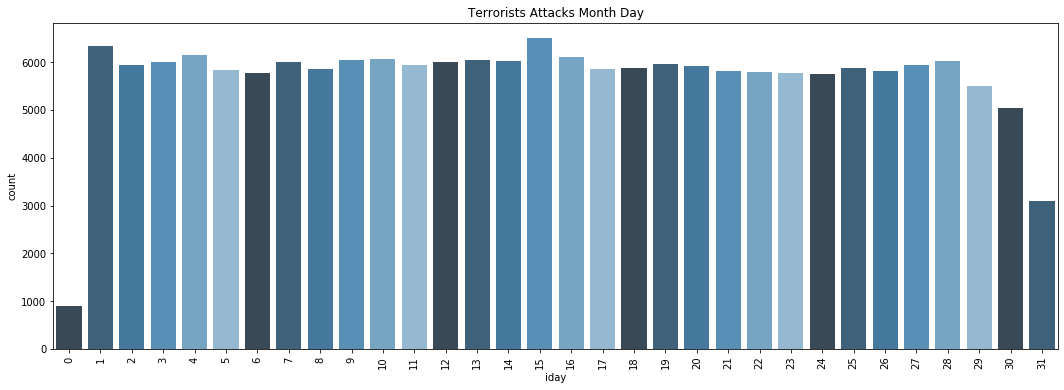

In [6]:
plt.subplots(figsize=(18,6))
sns.countplot('iday', data=df, palette=sns.color_palette("Blues_d"))
plt.xticks(rotation=90)
plt.title('Terrorists Attacks Month Day')
plt.show()

In [7]:
df[df.iday == 0]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
96,197003000001,1970,3,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104603,201112170006,2011,12,0,12/22/2011,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,"""Settlers attack carol singers near Nablus,"" M...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
104611,201112170021,2011,12,0,12/17/2011,0,NaN,153,Pakistan,6,...,NaN,"""Militants blow up school, house in Bannu,"" Da...","""Pakistan: Militants blow up school, house in ...",NaN,START Primary Collection,-9,-9,0,-9,"201112170021, 201112170022, 201112170024"
104612,201112170022,2011,12,0,12/17/2011,0,NaN,153,Pakistan,6,...,NaN,"""Militants blow up school, house in Bannu,"" Da...","""Blast damages school in Bannu,"" Daily The Pos...","""Pakistan: Militants blow up school, house in ...",START Primary Collection,-9,-9,0,-9,"201112170022, 201112170021, 201112170024"
104613,201112170024,2011,12,0,12/17/2011,0,NaN,153,Pakistan,6,...,NaN,"""Militants blow up school, house in Bannu,"" Da...","""Blast damages school in Bannu,"" Daily The Pos...","""Pakistan: Militants blow up school, house in ...",START Primary Collection,-9,-9,0,-9,"201112170024, 201112170021, 201112170022"


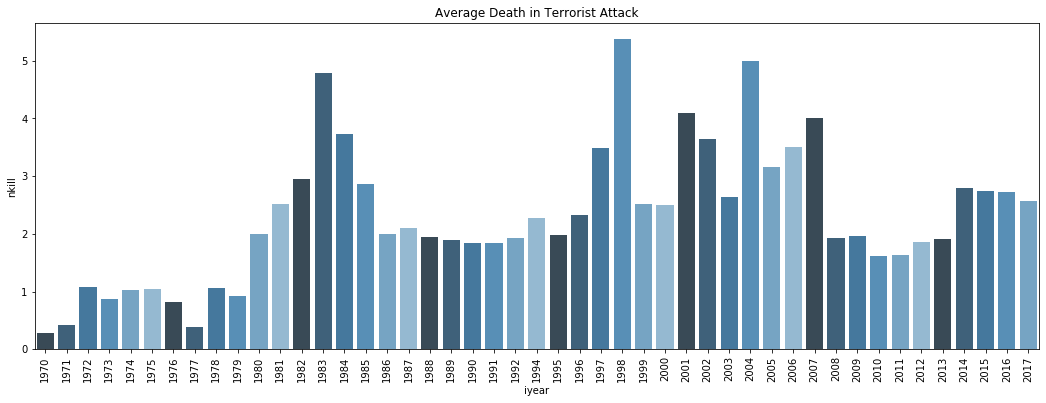

In [8]:
plt.subplots(figsize=(18,6))
sns.barplot(
    df.groupby(['iyear']).mean().index,
    df.groupby(['iyear'])['nkill'].mean(),
    palette=sns.color_palette("Blues_d")
)
plt.xticks(rotation=90)
plt.title('Average Death in Terrorist Attack')
plt.show()

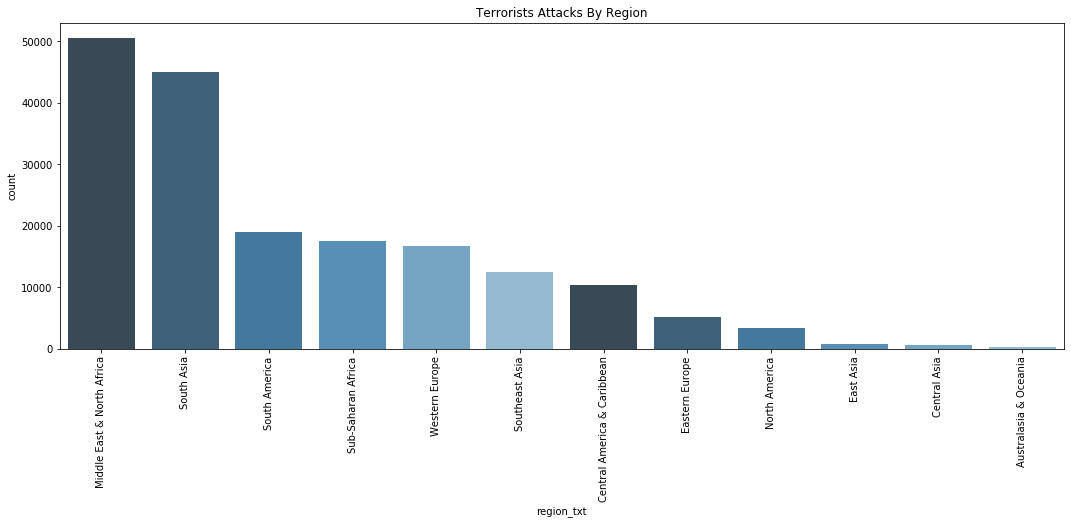

In [9]:
plt.subplots(figsize=(18,6))
sns.countplot(
    'region_txt', 
    data=df, 
    palette=sns.color_palette("Blues_d"),
    order=df['region_txt'].value_counts().index
)
plt.xticks(rotation=90)
plt.title('Terrorists Attacks By Region')
plt.show()

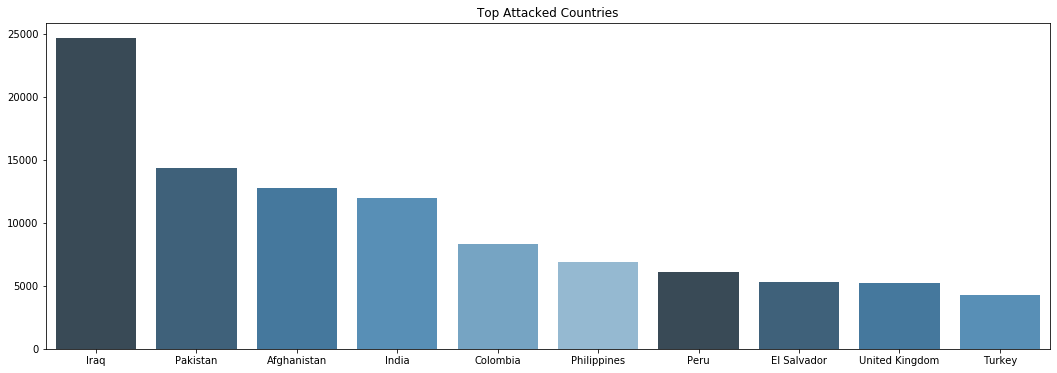

In [10]:
plt.subplots(figsize=(18,6))
sns.barplot(
    df['country_txt'].value_counts()[:10].index,
    df['country_txt'].value_counts()[:10].values,
    palette=sns.color_palette("Blues_d"),
)
plt.title('Top Attacked Countries')
plt.show()

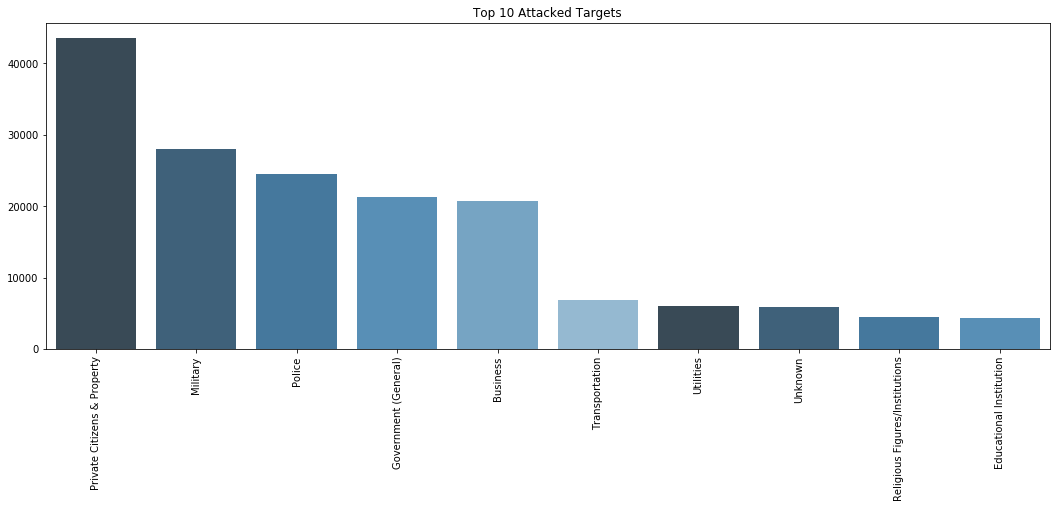

In [11]:
plt.subplots(figsize=(18,6))
sns.barplot(
    df['targtype1_txt'].value_counts()[:10].index,
    df['targtype1_txt'].value_counts()[:10].values,
    palette=sns.color_palette("Blues_d"),
)
plt.xticks(rotation=90)
plt.title('Top 10 Attacked Targets')
plt.show()

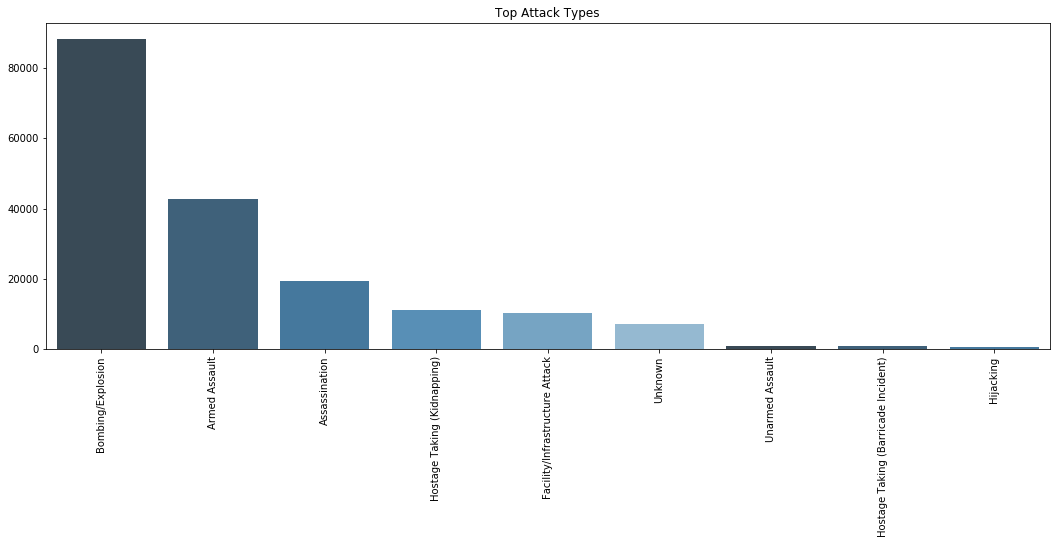

In [12]:
plt.subplots(figsize=(18,6))
sns.barplot(
    df['attacktype1_txt'].value_counts().index,
    df['attacktype1_txt'].value_counts().values,
    palette=sns.color_palette("Blues_d"),
)
plt.xticks(rotation=90)
plt.title('Top Attack Types')
plt.show()

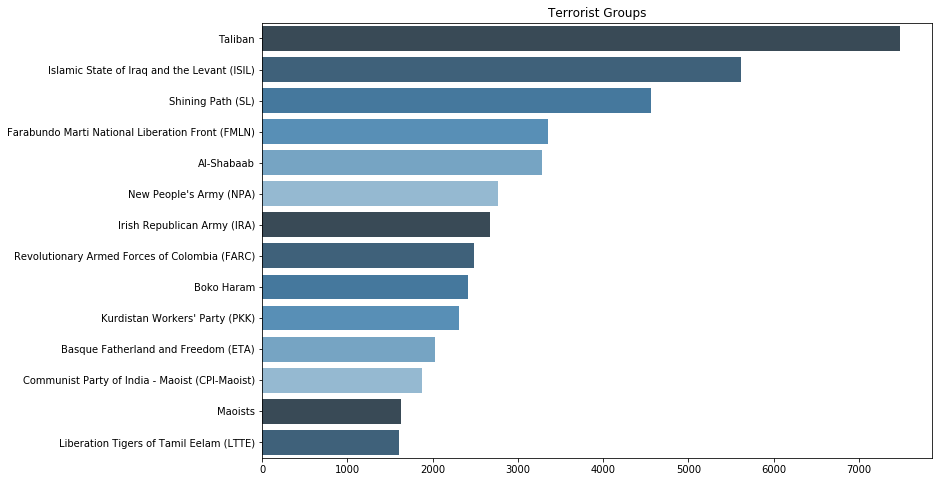

In [13]:
sns.barplot(
    # first value is Unknown
    df['gname'].value_counts()[1:15].values,
    df['gname'].value_counts()[1:15].index,
    palette=sns.color_palette("Blues_d"),
)
fig=plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Terrorist Groups')
plt.show()

Отношение суицида при терракте и успешности терракта.

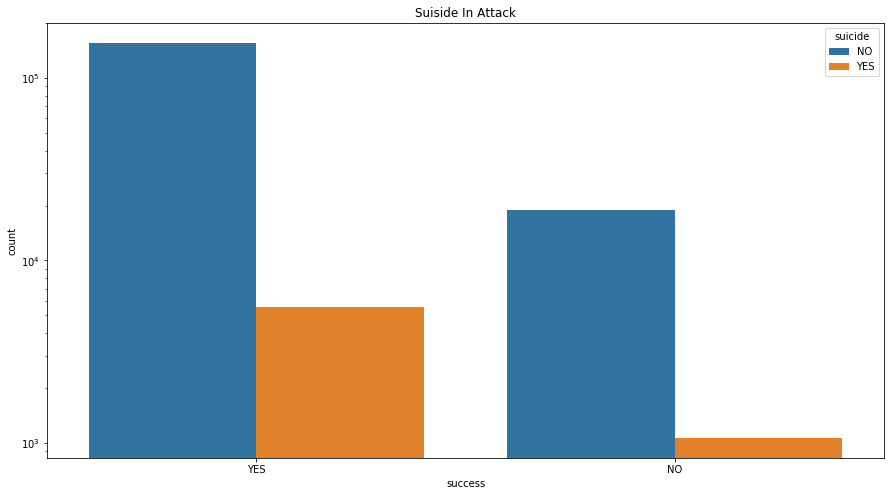

In [14]:
p = sns.countplot(
    x='success', 
    data=df, 
    hue='suicide',
)
p.set_yscale("log")
fig=plt.gcf()
fig.set_size_inches(15, 8)
plt.title('Suiside In Attack')
plt.show()